# Project 3

### AIM: The aim of this project is to build a predictive model which will predict the good and bad cutomer based on other features in the dataset. 

In this project we'll be exploring Logistic reggresion and decision tree models due to the following reasons:
1. Logistic Regression is used for solving binary categorical problems anad in this case is it binary and categorical. However we do have other regression models for multiple classification which are non binary such as Multinomiala Logistic Regression.
2. We'll also use Decision Tree which is used for classification based problems and in this case we'll be classifying cutomers on the basis of their credit history.

Workflow of the project:
1. Import Dependencies
2. Load Dataset
3. Data preprocessing
4. Exploratory data analysis
5. Slecting feature
6. Splitting Data
7. Model Development using sklearn
8. Prediction
9. Model evaluation using confusion matrix
10. Visualizing confusion matrix using heatmap
11. Hyperparameter Tuning

## 1. Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib.inline 
import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

In [2]:
df = pd.read_csv('German_credit_data.csv')

## 3. Data Preparation

In [3]:
df.shape

(1000, 21)

In [4]:
df.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [5]:
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [7]:
df.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [8]:
df.nunique(axis = 0, dropna = True)

Creditability                          2
Account Balance                        4
Duration of Credit (month)            33
Payment Status of Previous Credit      5
Purpose                               10
Credit Amount                        923
Value Savings/Stocks                   5
Length of current employment           5
Instalment per cent                    4
Sex & Marital Status                   4
Guarantors                             3
Duration in Current address            4
Most valuable available asset          4
Age (years)                           53
Concurrent Credits                     3
Type of apartment                      3
No of Credits at this Bank             4
Occupation                             4
No of dependents                       2
Telephone                              2
Foreign Worker                         2
dtype: int64

In [9]:
df.describe(include = [np.number])

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


## 4. Exploratory Data Analysis

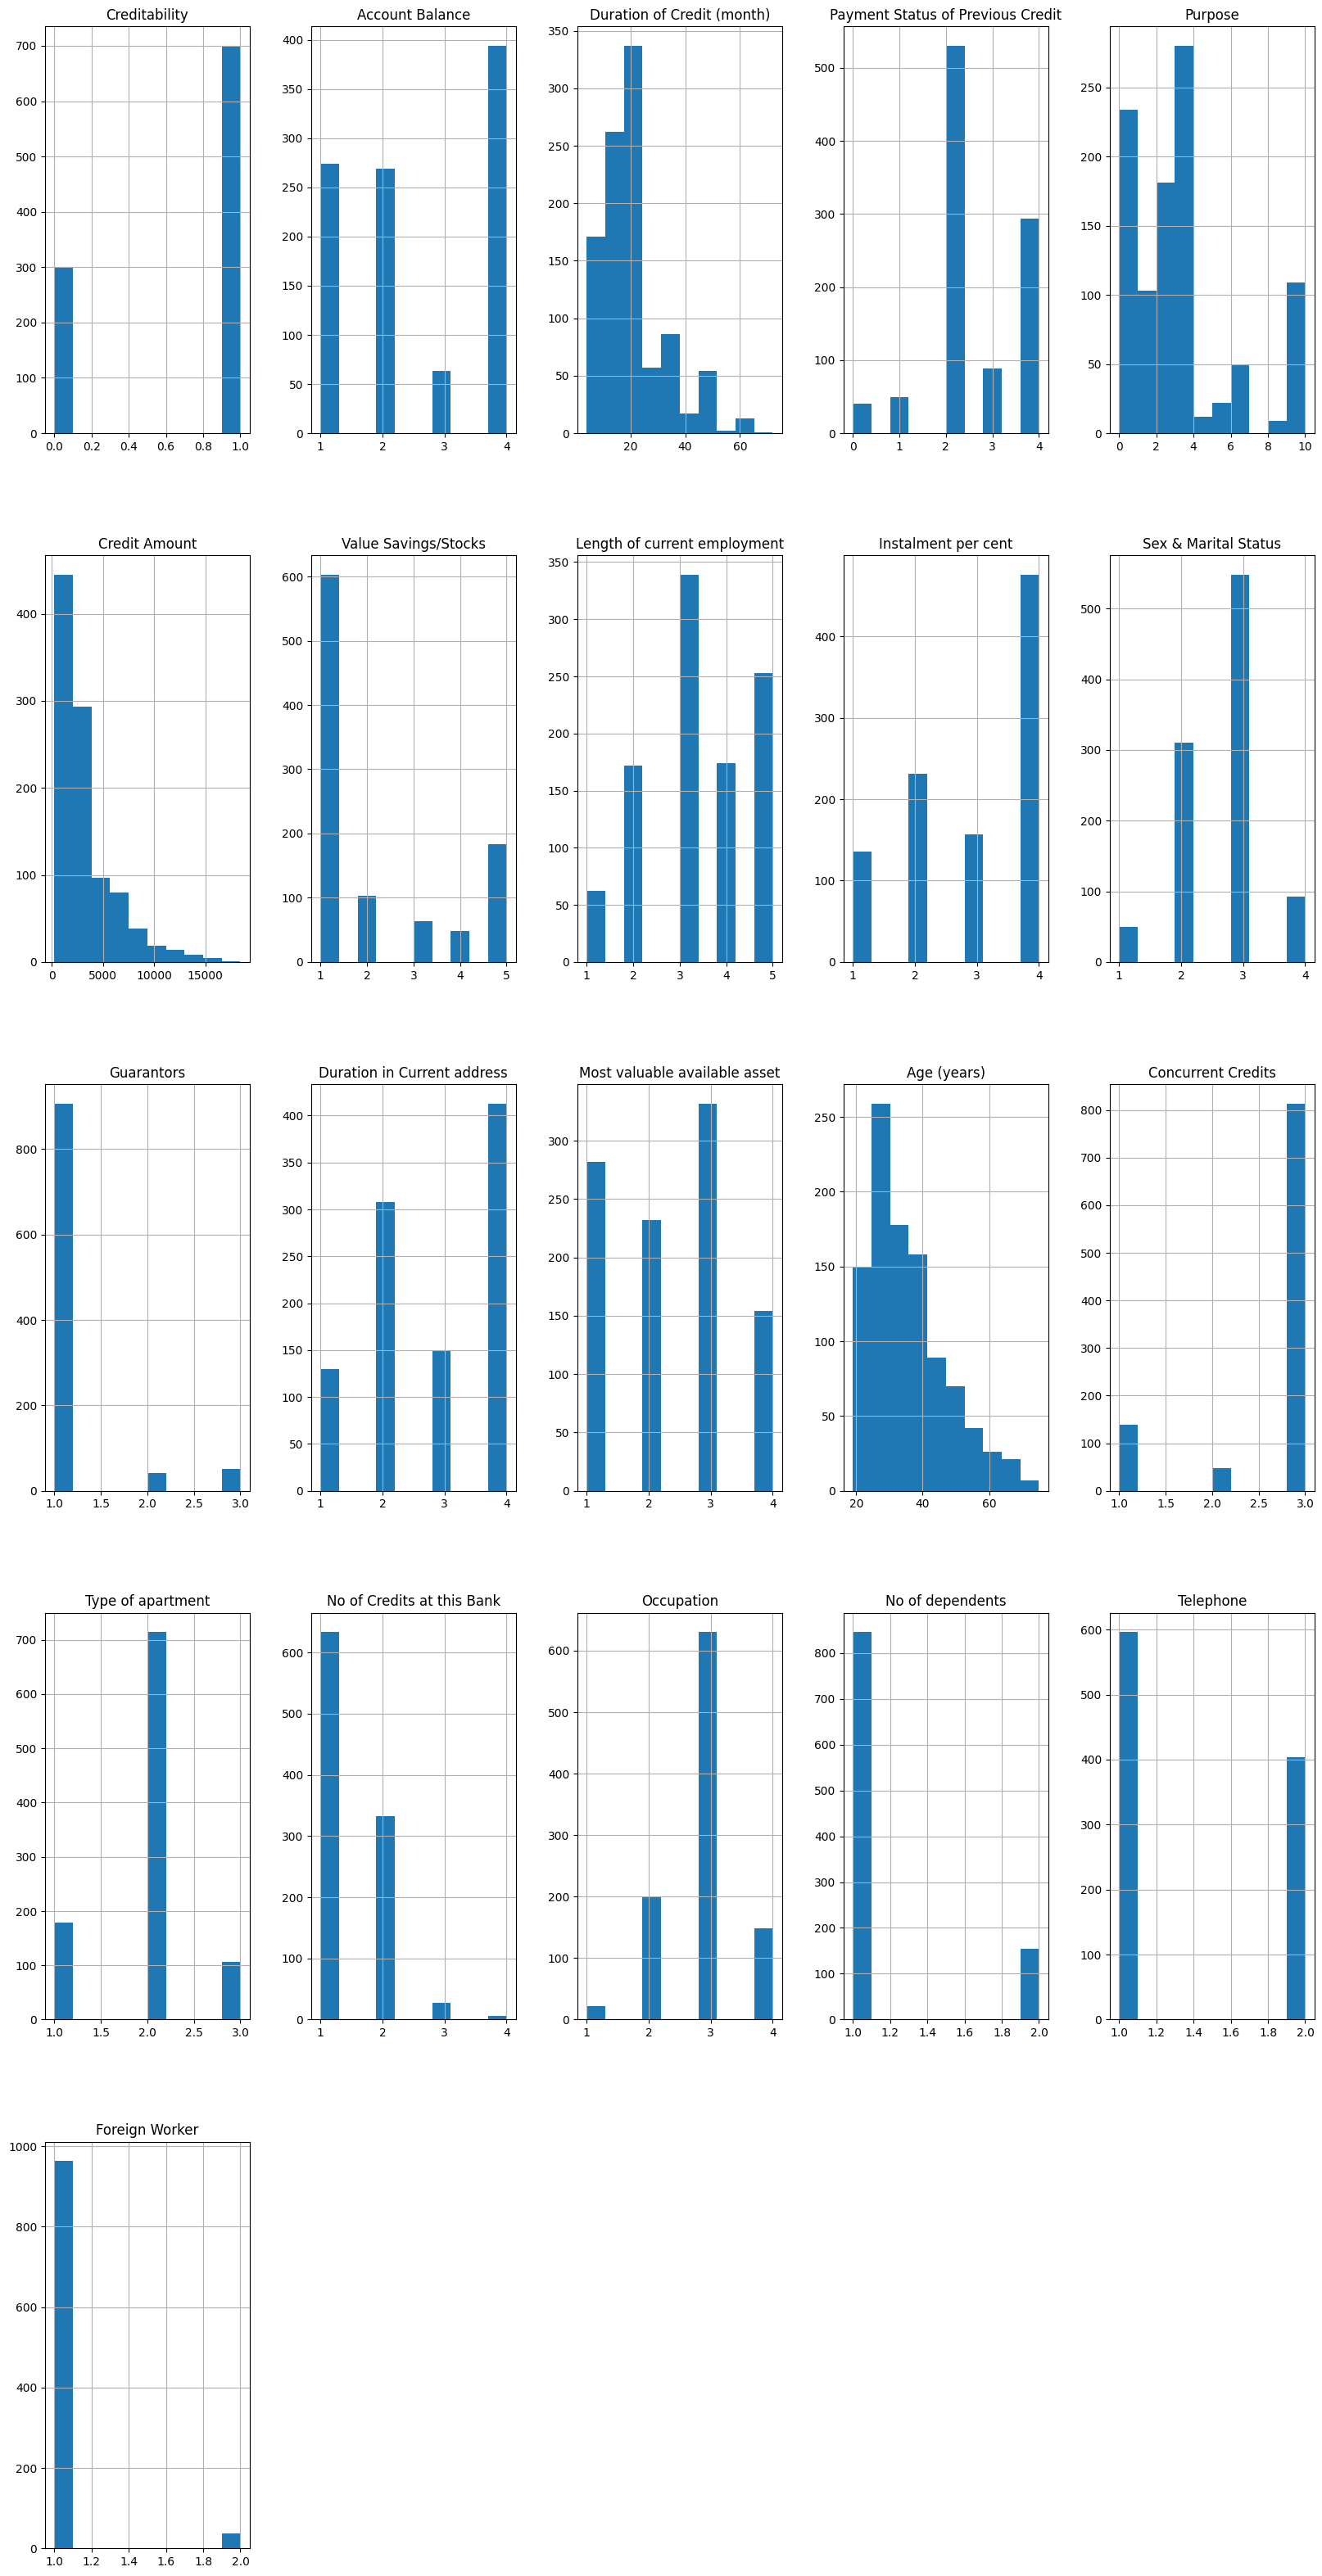

In [10]:
df.hist(figsize = (20,40))
plt.show()

### Visualizing data

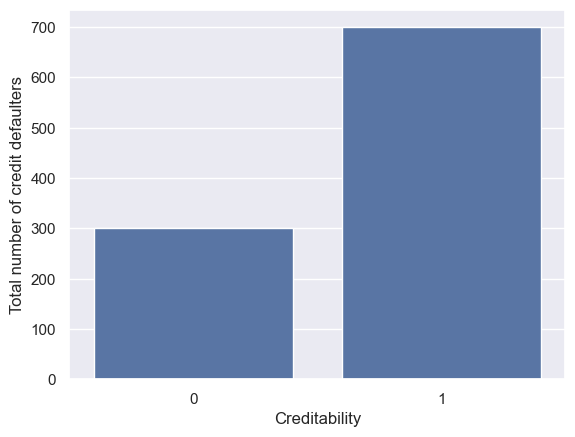

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.ylabel('Total number of credit defaulters')
ax = sns.countplot(x = 'Creditability', data = df)
plt.show()

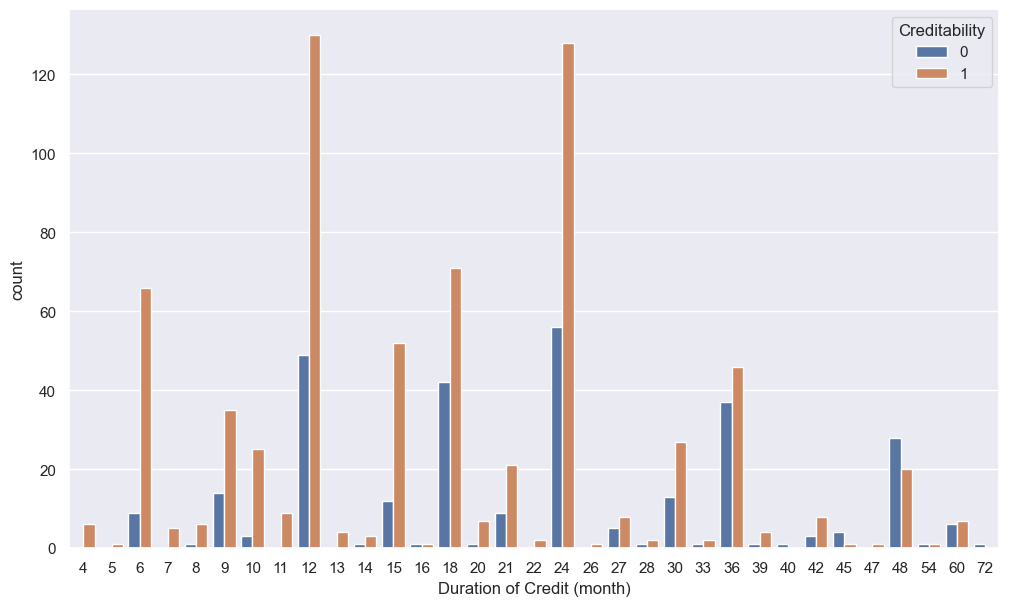

In [12]:
plt.figure(figsize=(12, 7))
g = sns.countplot(x='Duration of Credit (month)', hue='Creditability', data=df)
plt.show()

### Splitting groups to check the creditability of customers

In [13]:
df_gender = df.groupby(['Sex & Marital Status', 'Creditability'])['Purpose'].value_counts()
df_gender

Sex & Marital Status  Creditability  Purpose
1                     0              2          6
                                     9          5
                                     0          4
                                     3          3
                                     5          1
                                               ..
4                     1              2          5
                                     1          5
                                     8          2
                                     5          2
                                     6          1
Name: count, Length: 68, dtype: int64

For better understanding,
1. 1: male : divorced/seperate
2. 2: female : divorced/married/seperated
3. 3: male : single
4. 4: male : married/vidoved
5. 5: female : single

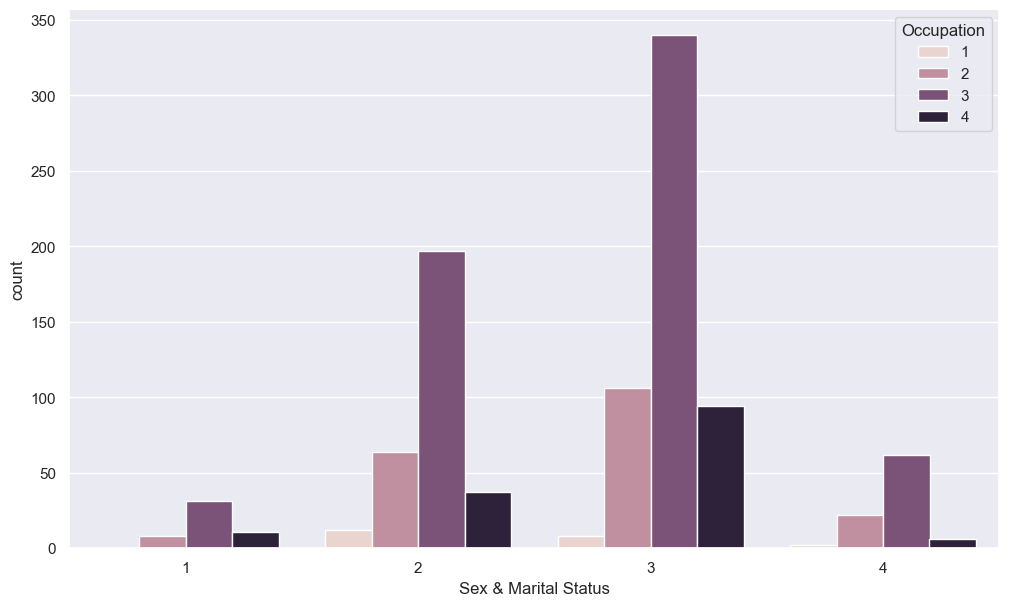

In [14]:
plt.figure(figsize = (12,7))
ax = sns.countplot  (x = 'Sex & Marital Status', hue = 'Occupation', data = df)
plt.show()

For bettter understaning,
1. 1 = unemployed/unskiklled-nonresident
2. 2 = unskilled - resident
3. 3 = skilled emplyee / official
4. 4 = self-employed, employee, officer, management

This will tell us about the customers counts and theri occupation.

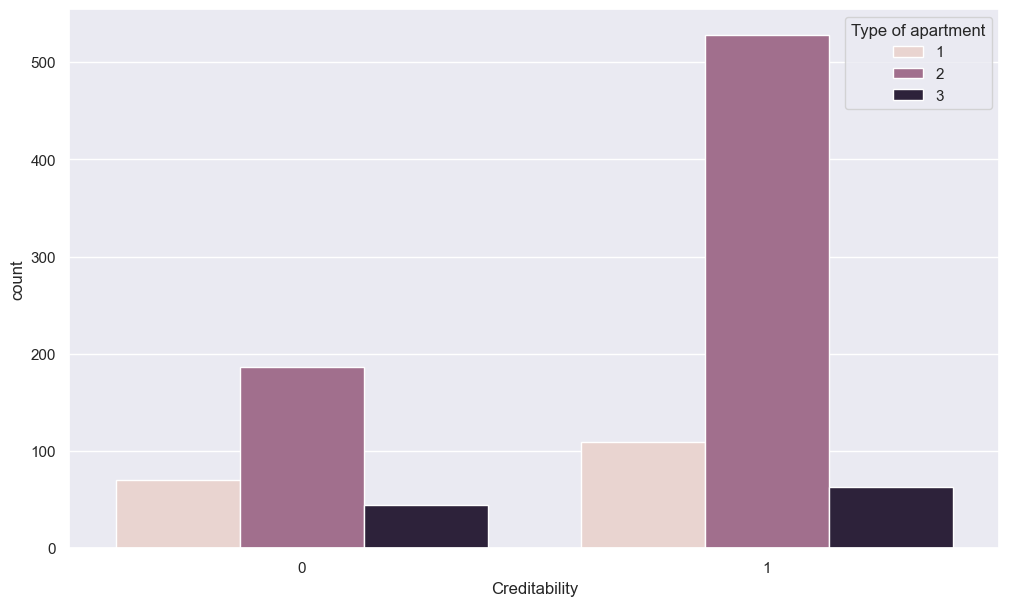

In [15]:
plt.figure(figsize = (12,7))
ax = sns.countplot(x = 'Creditability', hue = 'Type of apartment', data = df)
plt.show()

For bettter understaning,1. 1 = rent
2. 2 = own
3. 3 = for freeement

## 5. Slecting Features

### Correlation

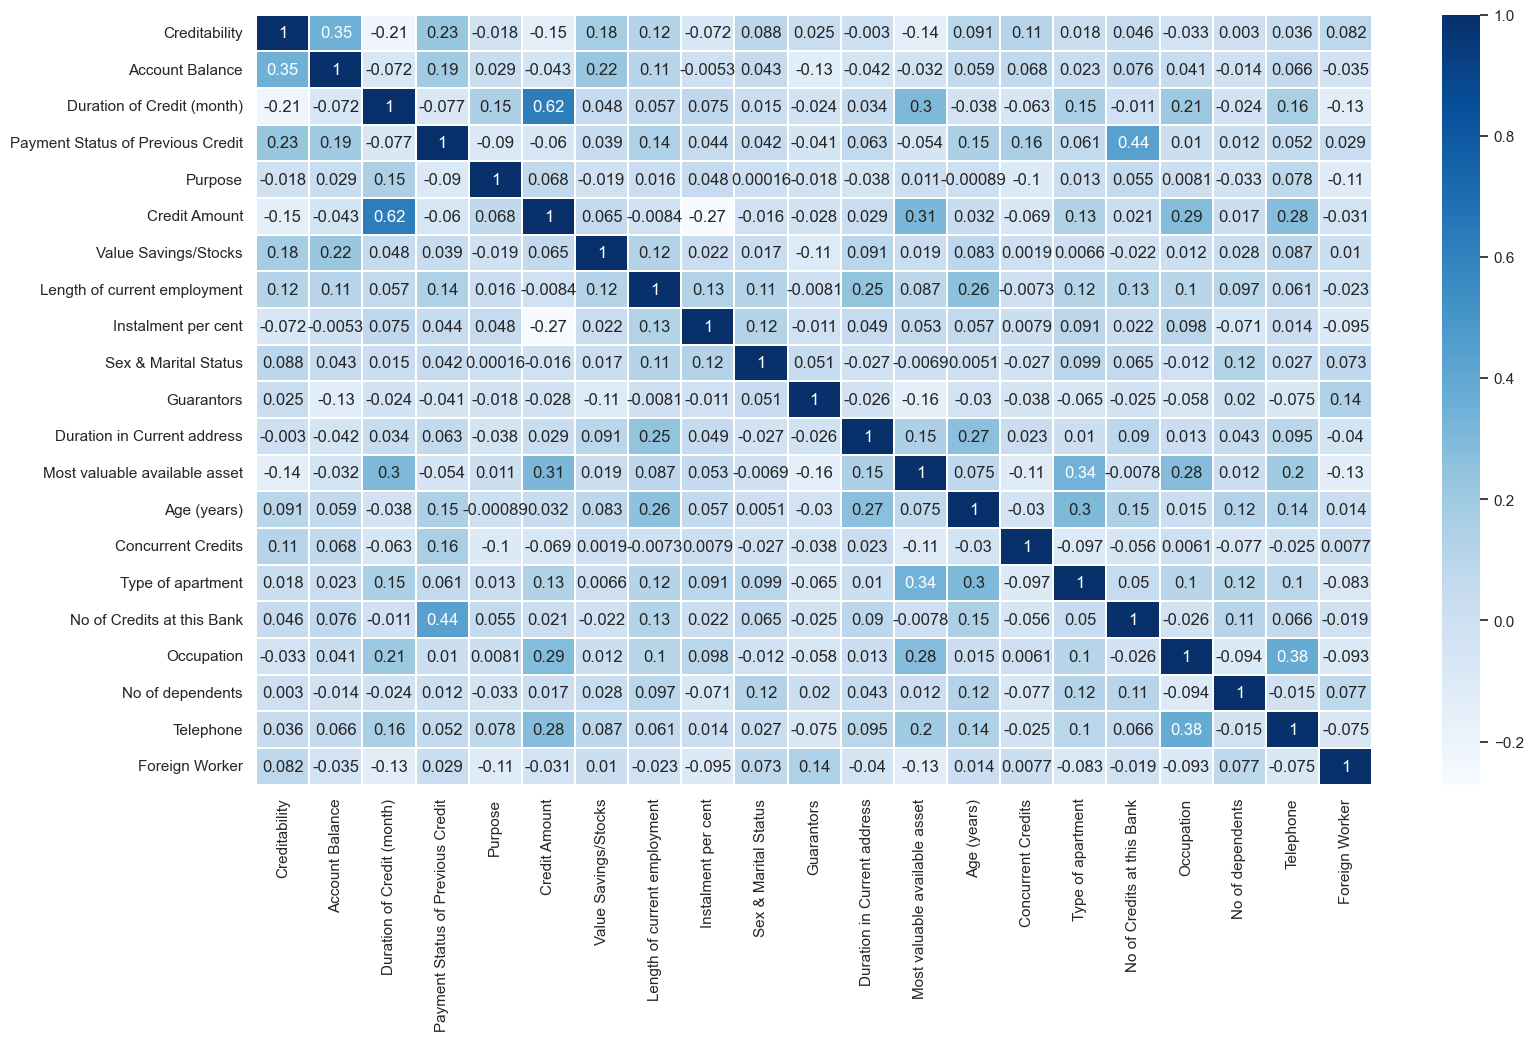

In [16]:
corr = df.corr()
plt.figure(figsize = (18,10))
sns.heatmap(corr,annot = True, cmap = 'Blues', linewidth = 0.1)
plt.show()

Since, there are so many values in the heatmap, lets set up a criteria to make it more readable.

<Axes: >

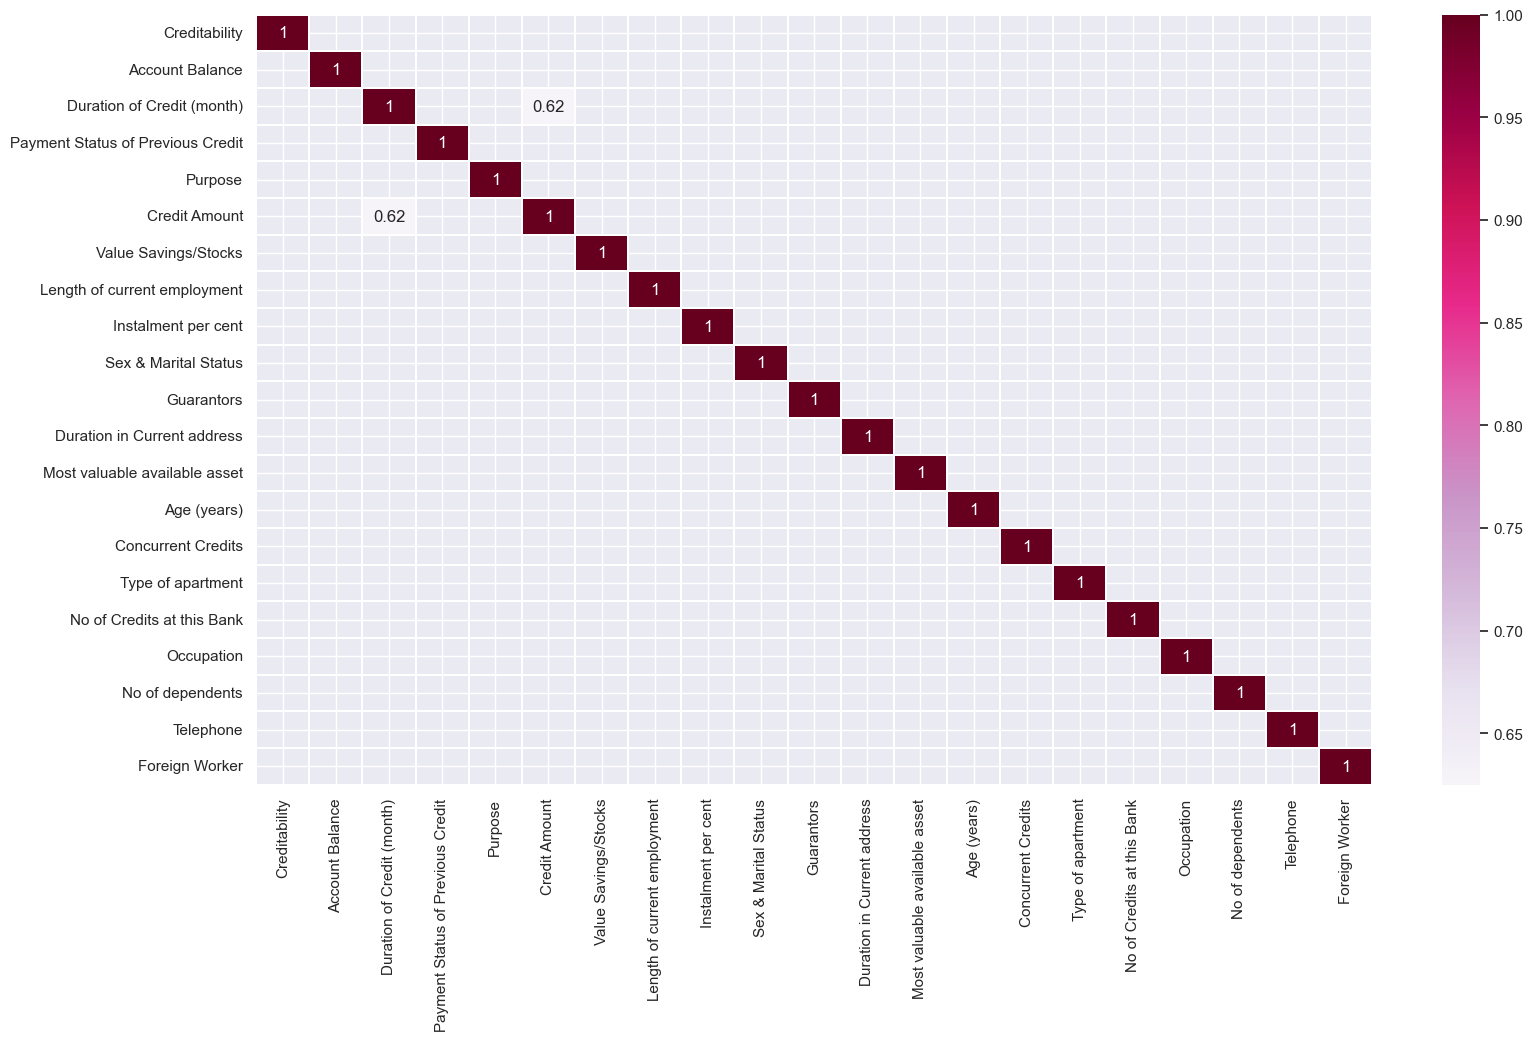

In [17]:
plt.figure(figsize = (18,10))
sns.heatmap(corr[(corr>=0.5) | (corr<=-0.5)], annot=True,linewidth=0.1, cmap = 'PuRd')

#### 'Credit Amount' & 'Duration of Credit (month)' are highly correlated.

### Preparation of Datasets

In [18]:
predictor = df.iloc[:, df.columns != 'Creditability']
Target = df.iloc[:, df.columns == 'Creditability']

## 6. Spliting the data into train/test

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictor, Target, random_state = 1, test_size = 0.30)
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (700, 20)
y_train: (700, 1)
x_test: (300, 20)
y_test: (300, 1)


## 7. Model Development

In [20]:
from sklearn.linear_model import LogisticRegression

#creating an insttance of logistic regression
logr = LogisticRegression()

#fit the data to the model
logr.fit(x_train, y_train)

y_pred = logr.predict(x_test)

## 8. Making Predictions

In [21]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

Now, to evaluate our model we'll use confusion matix

## 9. Model Evaluation using Confusion Matix

#### Confusion Matrix

In [22]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred, y_test)
cnf_matrix

array([[ 40,  20],
       [ 51, 189]], dtype=int64)

For better understanding,
1. True Positive => actual result = CD; prediction = CD; These are 189
2. True Negetive => actual result = not CD; prediction = not CD; These are 40
3. False Positive => actual result = not a CD; prediction = CD; These are 20
4. False Negetive => actual result = CD; prediction = not a CD; These are 51

## 10. Visualising Cofusing matrix using Heatmap

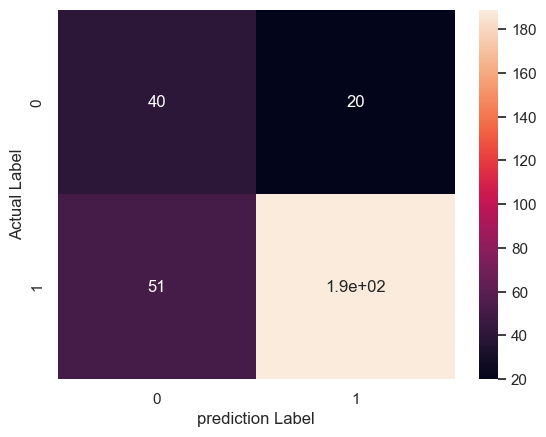

In [23]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
plt.xlabel('prediction Label')
plt.ylabel('Actual Label')
plt.show()

1. checking the accuracy of the model = (TP+TN)/(TP+TN+FP+FN)
2. Precision = TP/(TP+TF) => how many cutomers are actually bad customers.
3. Recall = TP/(TP+FN) => How many did out model labelled as true credit defaulters.
4. F1 score

## 11. Hyperparameter Tuning

In [24]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

logistic_reggresion_accuracy = accuracy * 100
print('Accuracy: ',logistic_reggresion_accuracy)
print('Precision:', precision * 100, '%')
print('Recall:', recall * 100, '%')

Accuracy:  76.33333333333333
Precision: 78.75 %
Recall: 90.43062200956938 %


#### We can also plot these results in a curve which is known as ROC (Reciever operating characterstic) curve which is a plot of TP against FP, it shows the trade-off between sensitivity and specificity.

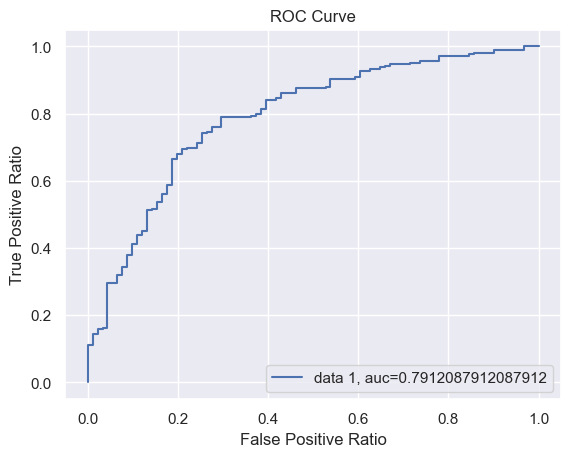

In [25]:
y_pred_prob = logr.predict_proba(x_test) [::,1]
fpr, tpr, _=metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = 'data 1, auc=' +str(auc))
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.legend(loc = 4)
plt.show()

AUC score for this case is 0.79. AUC score represents the perfect classifiers, so it's not a bad score as 0.5 represent a worthless classifiers

### K-fold evaluation

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits = 3, random_state = 7, shuffle = True)
result = cross_val_score(logr , x_train, y_train, cv = kfold, scoring = 'accuracy')
print(result)

[0.6965812  0.76824034 0.75107296]


### Gridsearch CV

In [27]:
from sklearn.model_selection import GridSearchCV
dual = [True,False]
max_iter = [100,110,120,130,140]
param_grid = dict(dual = dual, max_iter=max_iter)
import time
lr = LogisticRegression(penalty ='l2')
grid = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 3, n_jobs = 1)
start_time = time.time()
grid_result = grid.fit(x_train,y_train)
print('best: %f using %s' % (grid_result.best_score_,grid_result.best_params_))
print('Execution time' +str((time.time()-start_time))+'ms')

best: 0.748579 using {'dual': False, 'max_iter': 130}
Execution time0.7501258850097656ms


### Randomsearch CV

In [28]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator = lr, param_distributions=param_grid, cv = 3, n_jobs = 1)
start_time = time.time()
random_result = random.fit(x_train, y_train)

# summerize the result
print('Best score: %f using %s' % (random_result.best_score_,random_result.best_params_))
print('Execution time: ' +str((time.time()- start_time)) + 'ms')

Best score: 0.748579 using {'max_iter': 130, 'dual': False}
Execution time: 0.7744793891906738ms


## Using Decision Tree Model

It's a flow chart tree-like structure in which internal node represents feature and the branch represents the rules.

Working of decision tree: 
1. Select best attribute for splitting
2. Breaks dataset based on selection
3. Build tree recursively

Types of decision tree:
1. Binary variable decision tree
2. Continous variable decision tree

Keywords:
1. Root Node
2. Splitting
3. Decision Node
4. Leaf/terminal Node
5. Prunning
6. Branch/sub-tree
7. Parent and child node

### Attribute Selection Measure

* Information Gain: ID3 Algorithm uses Information Gain
* Gain Ratio: C4.5 Algorithm uses Gain Ration
* Gini Index: CART (classification and regression tree) Algorithm uses Gini Index

## Workflow

1. Import required Libraries
2. Load Data
3. Feature Selection
4. Splitting Data
5. Building Decision Tree Model
6. Evaluating Model
7. Visualizing Decision Tree

## Importing Libraries

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Train Classifiers


In [30]:
dt = DecisionTreeClassifier(max_depth=3)
dt = dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [31]:
Decision_tree_accuracy = (metrics.accuracy_score(y_test, y_pred))*100
print('Accuracy: ', Decision_tree_accuracy)

Accuracy:  73.33333333333333


## Visualizing Graph

In [32]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import collections

In [33]:
feature_columns =  ['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker']

## Visualizing Data

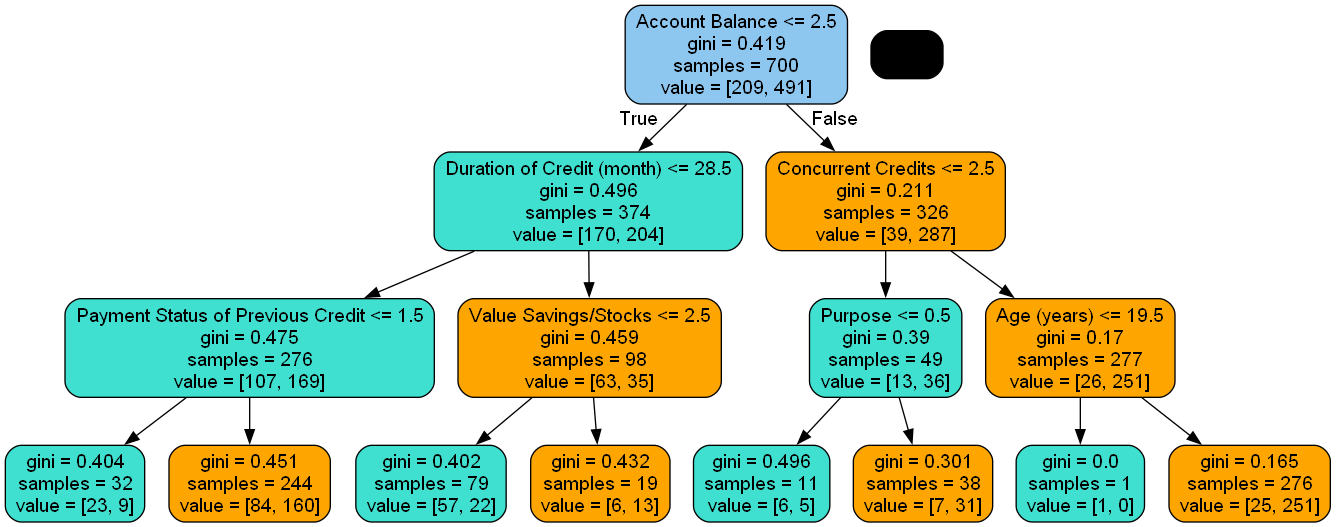

In [34]:
dot_data = export_graphviz(dt,
                           feature_names=feature_columns,
                           filled=True,
                           rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')

edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')
Image(graph.create_png())

## Using Random Forest

In [35]:
#importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Guassian Classifier 
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(x_test)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [36]:
from sklearn import metrics
Random_forest_accuracy = (metrics.accuracy_score(y_test,y_pred))*100
print('Accuracy: ', Random_forest_accuracy)

Accuracy:  76.66666666666667


# Conclusion

After trying and testing different models we came to the following conclusions:

In [37]:
p = logistic_reggresion_accuracy
q = Decision_tree_accuracy
r = Random_forest_accuracy
print('Logistic Regression Accuracy: ', p)
print('Decision Tree Accuracy: ', q)
print('Random Forest Accuracy: ', r)

Logistic Regression Accuracy:  76.33333333333333
Decision Tree Accuracy:  73.33333333333333
Random Forest Accuracy:  76.66666666666667


#### Hence, from above results we can clearly conclude that for stable accuracy we can choose logistic regression model.